In [2]:
import glob
import json
import os

import librosa
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

import utils
import plot_utils

# listen to audios
import IPython.display as ipd

# Parse output json file

In [7]:
def combine_output(json_list):
    """
    receive a list of output files. load then and combine them into a single one.
    """
    data = []
    for jf in json_list:
        with open(jf, "r") as f:
            data.append(json.load(f))
    return data        

In [4]:
# mullama_fs_list = glob.glob("../data/output_data/mullama_muchomusic_musiccaps_fs/*.json")
# mullama_zs_list = glob.glob("../data/output_data/mullama_muchomusic_musiccaps_zs/*.json")
qwen_fs_list = glob.glob("../data/output_data/qwenaudio_muchomusic_musiccaps_fs/*.json")
#qwen_desc_list = glob.glob("../data/output_data/qwenaudio_muchomusic_musiccaps_desc/*.json")

In [8]:
qwen_fs = combine_output(qwen_fs_list)
#qwen_desc = combine_output(qwen_desc_list)
# mu_fs = combine_output(mullama_fs_list)
# mu_zs = combine_output(mullama_zs_list)

In [9]:
with open("../data/output_data/qwen_fs.json", "w") as f:
    json.dump(qwen_fs, f)

#with open("../data/output_data/qwen_desc.json", "w") as f:
#    json.dump(qwen_desc, f)
    
# with open("../data/output_data/mullama_fs.json", "w") as f:
#     json.dump(mu_fs, f)

# with open("../data/output_data/mullama_zs.json", "w") as f:
#     json.dump(mu_zs, f)

# Compute MM-SHAP values

In [3]:
qfs = pd.read_json("../data/output_data/qwen_fs.json")
# mfs = pd.read_json("../data/output_data/mullama_fs.json")

In [4]:
qfs = utils.parse_df(qfs)

In [5]:
qfs[["a_shap"]].idxmax()

a_shap    550
dtype: int64

In [6]:
qfs[["a_shap"]].max()

a_shap    0.31109
dtype: float64

In [7]:
qfs.loc[qfs[["a_shap"]].idxmax()].values

array([['vrxT5jhqu0Q',
        'Question: What rhythm pattern do the digital drums primarily follow in this pop music piece? \n Options: (A) Four on the floor. (B) Off-beat syncopation. (C) Scat singing. (D) E-guitar playing a simple melody. \n The correct answer is: A\n Question: What is a possible practical use for the recorded material?\n Options: (A) Provides the percussion for a new song (B) Listening to the dance in its entirety (C) Rhythmic samples (D) Enhancing the dynamics of a song \n The correct answer is: ',
        list(['Provides the percussion for a new song', 'Listening to the dance in its entirety', 'Rhythmic samples', 'Enhancing the dynamics of a song']),
        list([2, 3, 0, 1]), 'musiccaps', 'Jazz',
        list(['functional context']), list([]),
        'musiccaps/audio/vrxT5jhqu0Q_20.wav',
        'The recorded material can be used as rhythmic samples in a song.',
        'data/output_data/qwenaudio_muchomusic_musiccaps_fs/550', 124,
        124, 2, 1,
        '

# Plot 

In [9]:
qfs[qfs["final_answer"] == 1][["question", "a_shap", "input_tokens", "output_tokens"]].sort_values(by="a_shap", ascending=False)

,question,a_shap,input_tokens,output_tokens
question_id,,,,
550,What is a possible practical use for the recor...,0.311090,"[\n, Question, :, What, rhythm, pattern, d...","[The, recorded, material, can, be, used, ..."
427,What does the male vocalist do at the end of t...,0.301570,"[\n, Question, :, What, rhythm, pattern, d...","[The, male, vocalist, laughs, at, the, e..."
335,Which percussive instrument provides the rhyth...,0.293183,"[\n, Question, :, What, rhythm, pattern, d...","[The, rhyth, mic, background, in, this, p..."
359,What instrument provides the primary rhythmic ...,0.275270,"[\n, Question, :, What, rhythm, pattern, d...","[The, instrument, that, provides, the, pr..."
488,Why is this song suitable for dancing at home?...,0.266181,"[\n, Question, :, What, rhythm, pattern, d...","[The, correct, answer, is, :, C, ), Due, ..."
...,...,...,...,...
487,Which of the following genres influences the s...,0.185585,"[\n, Question, :, What, rhythm, pattern, d...","[A, ., Afro, beat]"
491,What is the tempo of this song?\n Options: (A)...,0.185072,"[\n, Question, :, What, rhythm, pattern, d...","[The, tempo, of, this, song, is, moderat..."
546,Which genre best describes the music piece?\n ...,0.177917,"[\n, Question, :, What, rhythm, pattern, d...","[The, genre, of, the, music, piece, is, ..."


In [10]:
example = qfs.loc[427]

In [14]:
example["audio_path"]

'musiccaps/audio/gWRfk8nCcPs_150.wav'

In [12]:
example.name

427

In [13]:
question_id =  example.name

In [15]:
# dataset_path
# dataset_path = "/media/gigibs/DD02EEEC68459F17/datasets"
# dataset_path = "/scratch/gv2167/datasets/"
dataset_path = "."

In [16]:
# load audio
x, fs = librosa.load(os.path.join(dataset_path, example["audio_path"]), sr=16000)

In [17]:
x.shape

(159896,)

In [18]:
ipd.Audio(x, rate=fs)

In [36]:
# load data
data_path = os.path.join("..", example["output_folder"])

In [36]:
tokens = example["input_ids"]
audio_tokens = np.where(tokens < 0)[-1]
question_tokens = np.where(tokens >= 0)[-1]

In [37]:
tokens.shape, audio_tokens.shape, question_tokens.shape

((236,), (118,), (118,))

In [38]:
data = f"../{example['output_folder']}_info.npz"
data = np.load(data)

all_shapley_values = data["shapley_values"].squeeze(0).squeeze(0)
audio_shapley_values = all_shapley_values[audio_tokens]
question_shapley_values = all_shapley_values[question_tokens]

In [28]:
audio_shapley_values.shape

(118, 12)

In [29]:
abs_audio_shapley = np.abs(audio_shapley_values).sum(axis=1)
pos_audio_shapley = np.clip(audio_shapley_values, a_min=0, a_max=None).sum(axis=1)
neg_audio_shapley = np.clip(audio_shapley_values, a_min=None, a_max=0).sum(axis=1)

In [30]:
pos_audio_shapley.shape

(118,)

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

def plot_shapley_analysis(signal, audio_shapley_values, sample_rate,
                         gt_start, gt_end, colormap='viridis', 
                         figsize=(12, 8), idx=None, output_token=None):
    """
    Plot signal with Shapley value heatmaps in separate subplots with shared x-axis.
    
    Parameters:
    -----------
    signal : array-like
        The input signal (waveform) to display
    audio_shapley_values : array-like (2D)
        Raw Shapley values (will be summed across features)
    sample_rate : int
        Sampling rate of the audio signal (Hz)
    gt_start : float
        Start time of ground truth event (seconds)
    gt_end : float
        End time of ground truth event (seconds)
    colormap : str, optional
        Matplotlib colormap to use (default: 'viridis')
    figsize : tuple, optional
        Figure size (width, height) in inches (default: (12, 8))
    """
    
    # Calculate Shapley value components
    abs_shapley = np.abs(audio_shapley_values)#.mean(axis=1)
    pos_shapley = np.clip(audio_shapley_values, a_min=0, a_max=None)#.mean(axis=1)
    neg_shapley = np.clip(audio_shapley_values, a_min=None, a_max=0)#.mean(axis=1)

    if idx is None and output_token is None:
        abs_shapley = abs_shapley.sum(axis=1)
        pos_shapley = pos_shapley.sum(axis=1)
        neg_shapley = neg_shapley.sum(axis=1)
    
    # Create figure with subplots
    fig, axes = plt.subplots(4, 1, figsize=figsize, 
                           sharex=True, 
                           gridspec_kw={'height_ratios': [2, 1, 1, 1]})
    
    total_duration = len(signal) / sample_rate
    time_axis = np.linspace(0, total_duration, len(signal))
    shapley_time_axis = np.linspace(0, total_duration, len(abs_shapley))
    
    # --- 1. Signal plot (top subplot) ---
    ax_signal = axes[0]
    ax_signal.plot(time_axis, signal, color='gray', alpha=0.7, linewidth=0.5)
    ax_signal.set_ylabel('Amplitude', fontsize=10)
    
    # Add ground truth rectangle (only on signal plot)
    ymin, ymax = ax_signal.get_ylim()
    ax_signal.axvspan(gt_start, gt_end, ymin=0, ymax=1, 
                     color='red', alpha=0.3, label='Ground Truth')
    ax_signal.legend(loc='upper right')
    
    # --- 2. Absolute Shapley values ---
    ax_abs = axes[1]
    im_abs = ax_abs.imshow(
        np.repeat(abs_shapley.reshape(1, -1), 10, axis=0),
        aspect='auto',
        cmap=colormap,
        extent=[0, total_duration, 0, 1],
        vmin=0,  # Ensure consistent scaling
        vmax=np.max(abs_shapley)
    )
    ax_abs.set_ylabel('Absolute\nValue', rotation=0, ha='right', va='center', fontsize=10)
    ax_abs.set_yticks([])
    
    # --- 3. Positive Shapley values ---
    ax_pos = axes[2]
    im_pos = ax_pos.imshow(
        np.repeat(pos_shapley.reshape(1, -1), 10, axis=0),
        aspect='auto',
        cmap=colormap,
        extent=[0, total_duration, 0, 1],
        vmin=0,
        vmax=np.max(abs_shapley)  # Same scale as absolute
    )
    ax_pos.set_ylabel('Positive\nOnly', rotation=0, ha='right', va='center', fontsize=10)
    ax_pos.set_yticks([])
    
    # --- 4. Negative Shapley values ---
    ax_neg = axes[3]
    im_neg = ax_neg.imshow(
        np.repeat(np.abs(neg_shapley).reshape(1, -1), 10, axis=0),  # Show magnitude
        aspect='auto',
        cmap=colormap,
        extent=[0, total_duration, 0, 1],
        vmin=0,
        vmax=np.max(abs_shapley)  # Same scale as absolute
    )
    ax_neg.set_ylabel('Negative\nOnly', rotation=0, ha='right', va='center', fontsize=10)
    ax_neg.set_yticks([])
    ax_neg.set_xlabel('Time (seconds)', fontsize=12)
    
    # --- Colorbar ---
    cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    fig.colorbar(im_abs, cax=cax, label='Shapley Value Magnitude')
    
    # --- Formatting ---
    fig_title = "Shapley Values (sum over all output tokens)"
    if idx is not None:
        fig_title = f'Shapley Values -- Output Token: {output_token}'
    plt.suptitle(fig_title, y=0.98, fontsize=14)
    plt.tight_layout()
    
    # Remove boxes around subplots
    for ax in axes:
        ax.set_frame_on(False)
    
    plt.subplots_adjust(right=0.9, hspace=0.1)
    plt.show()

In [32]:
audio_shapley_values.shape

(118, 12)

/tmp/ipykernel_84744/3352594984.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


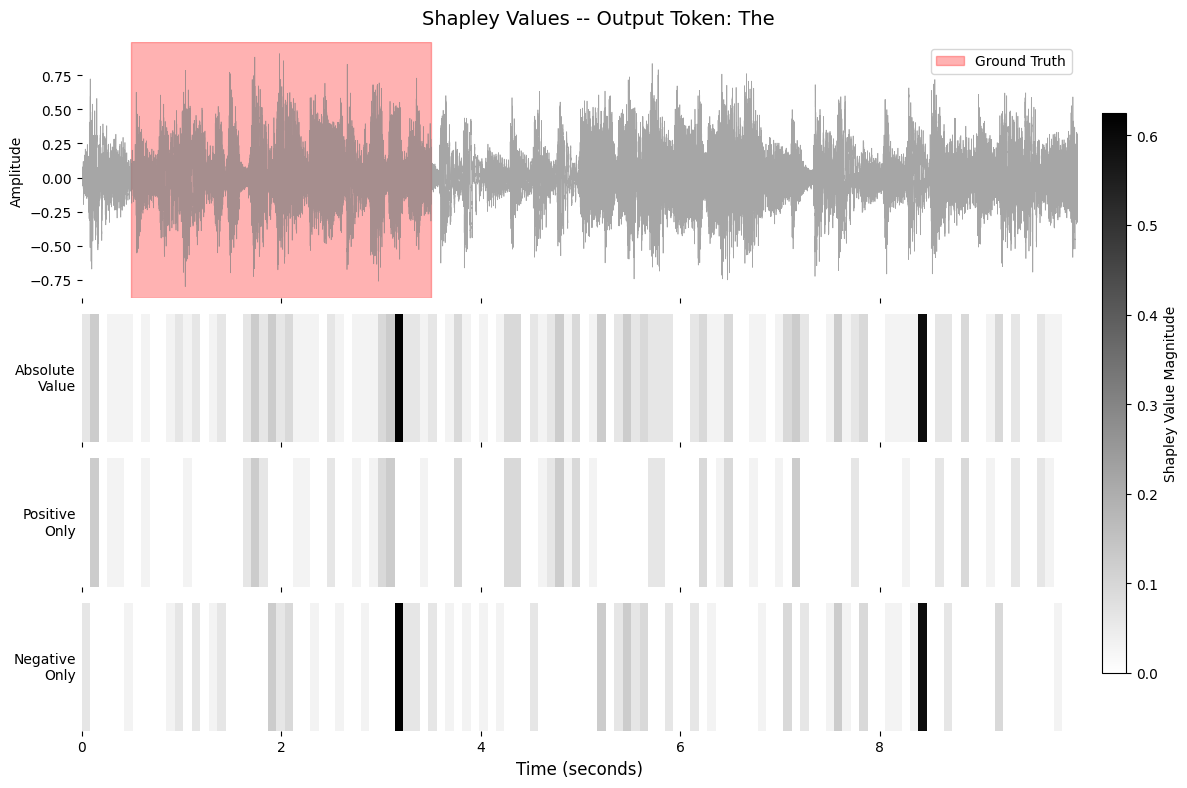

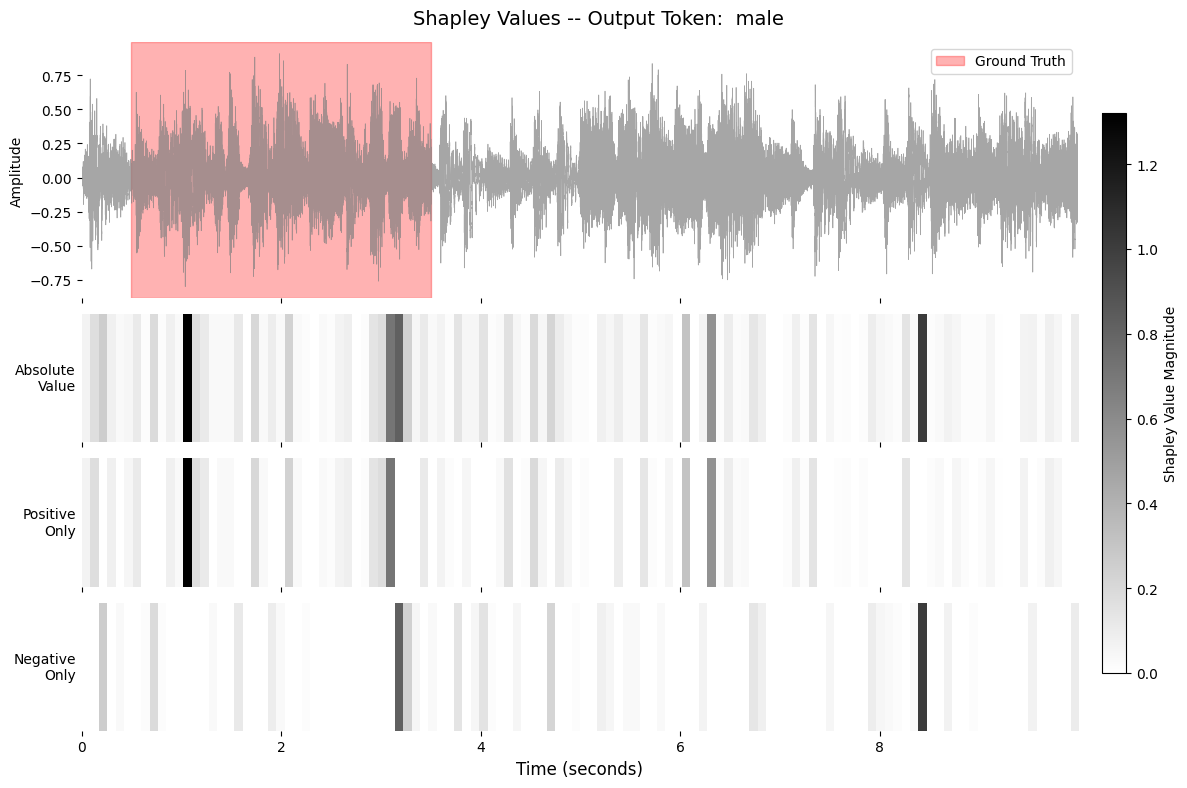

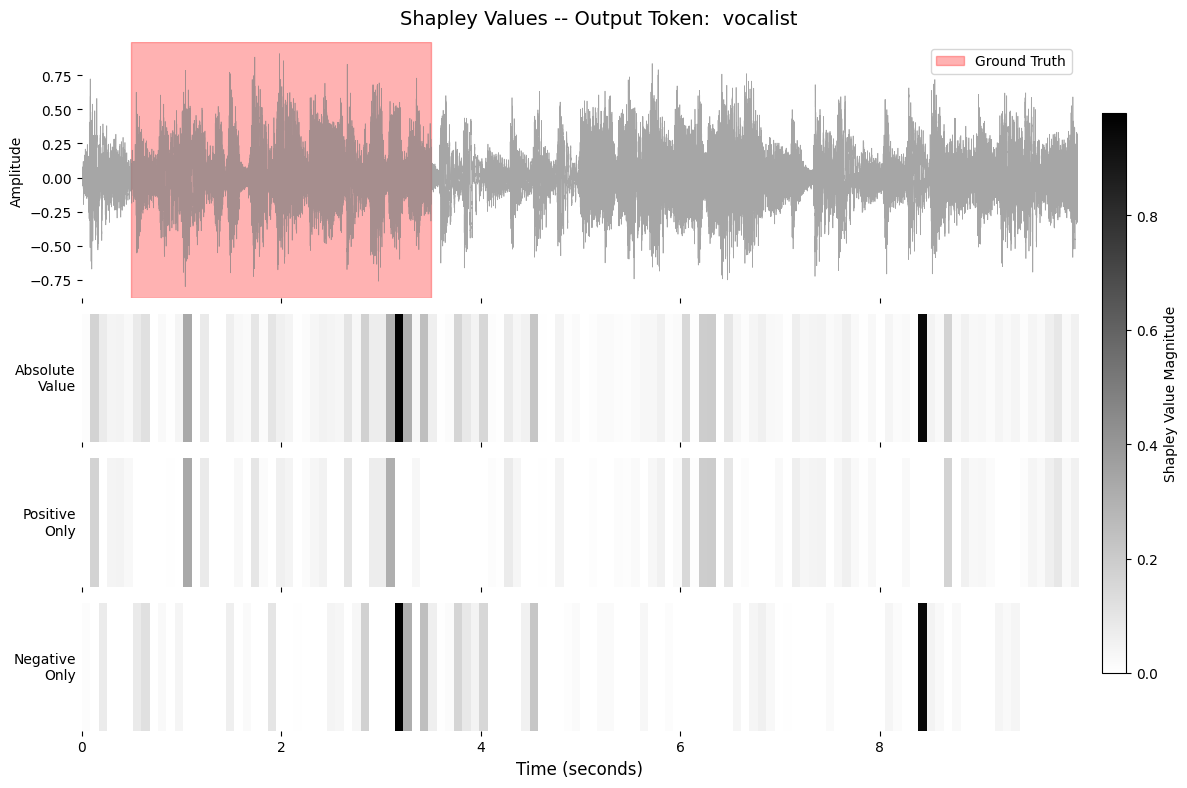

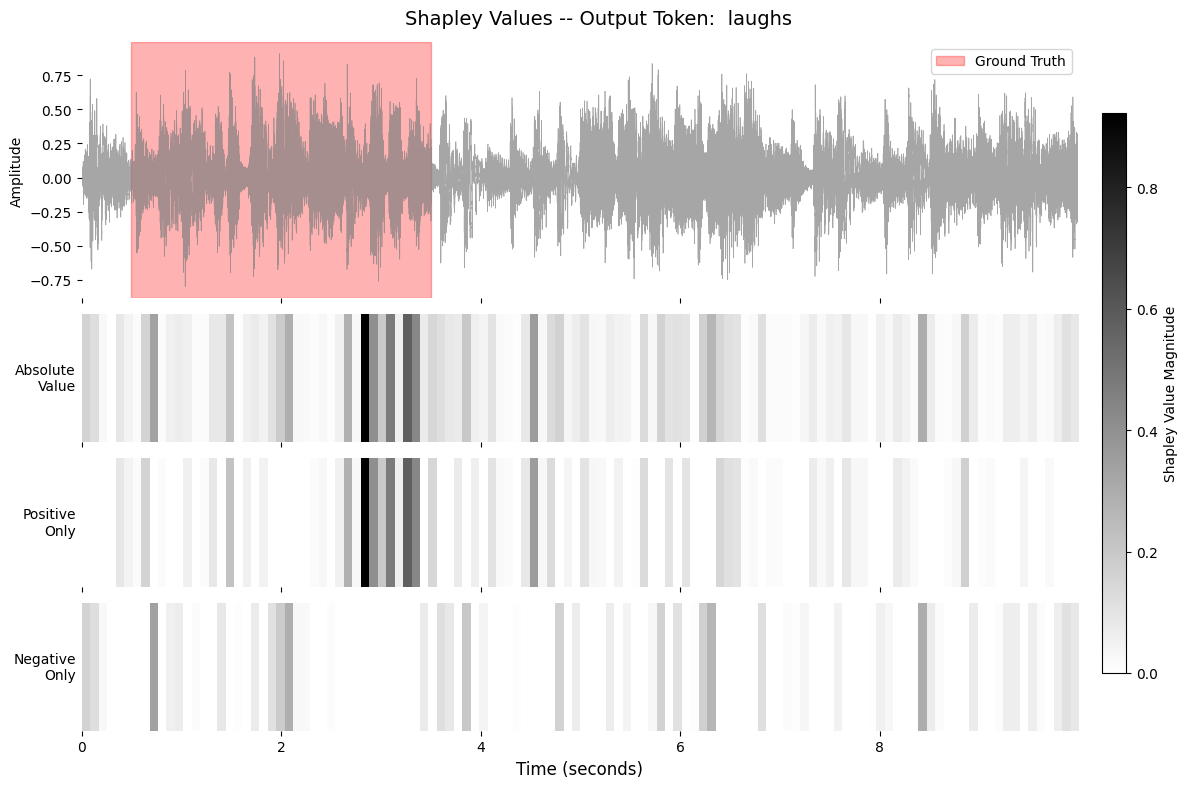

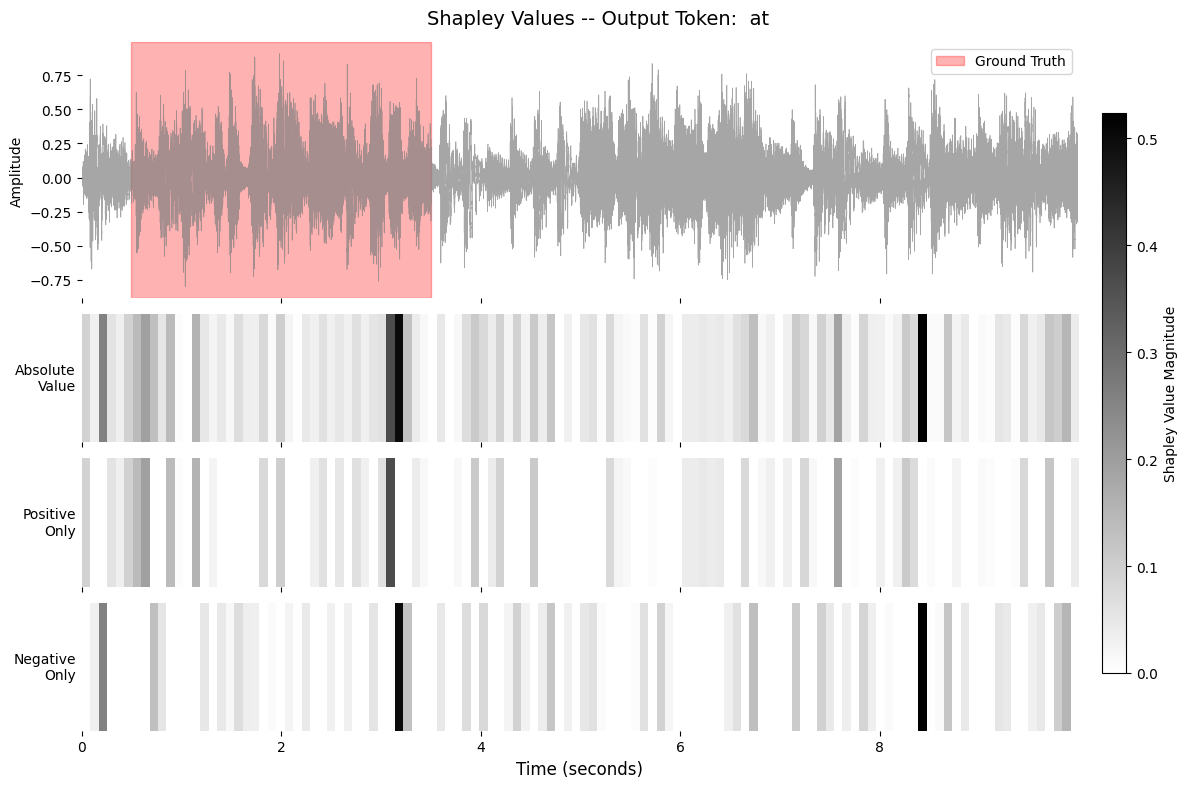

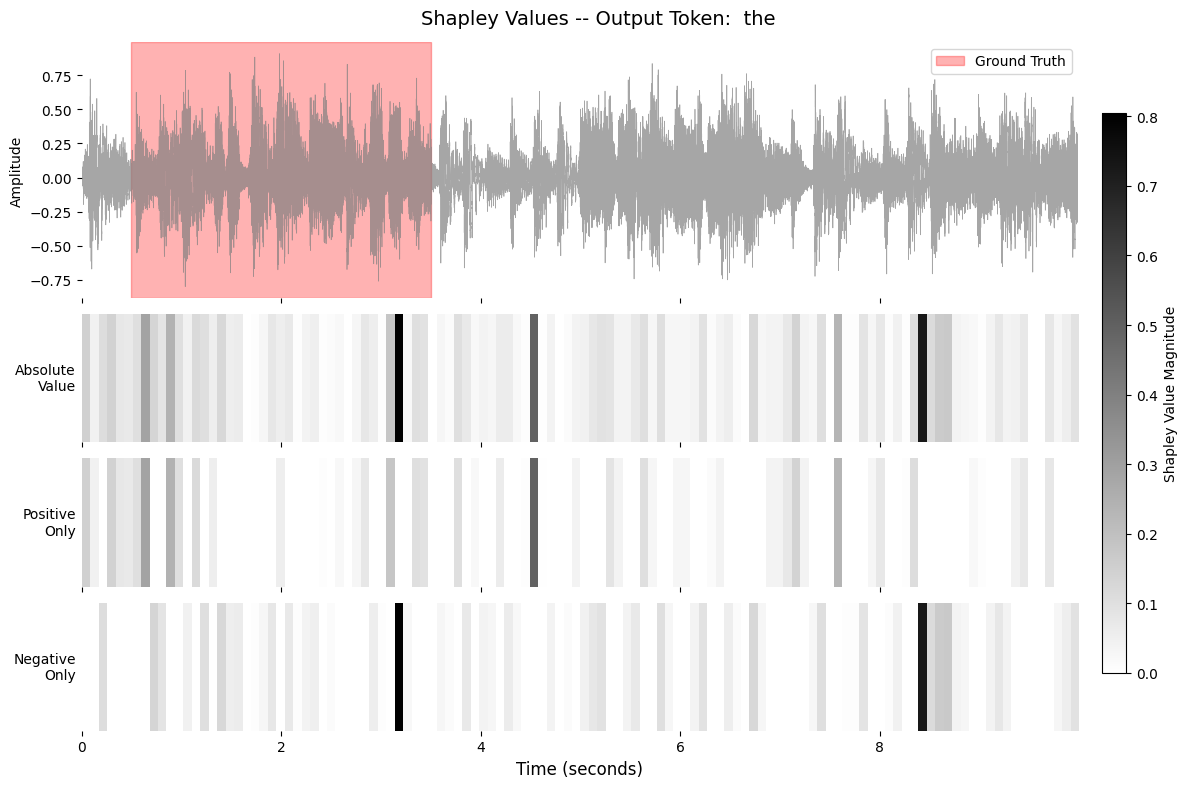

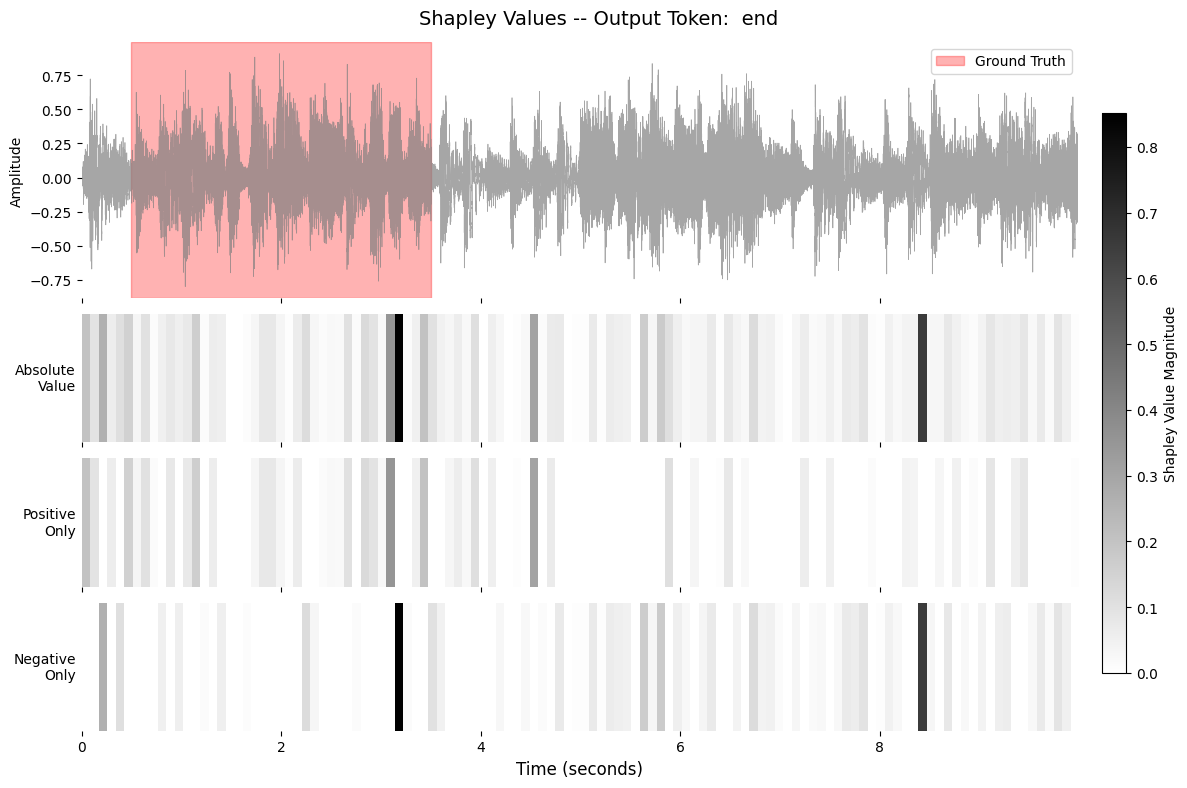

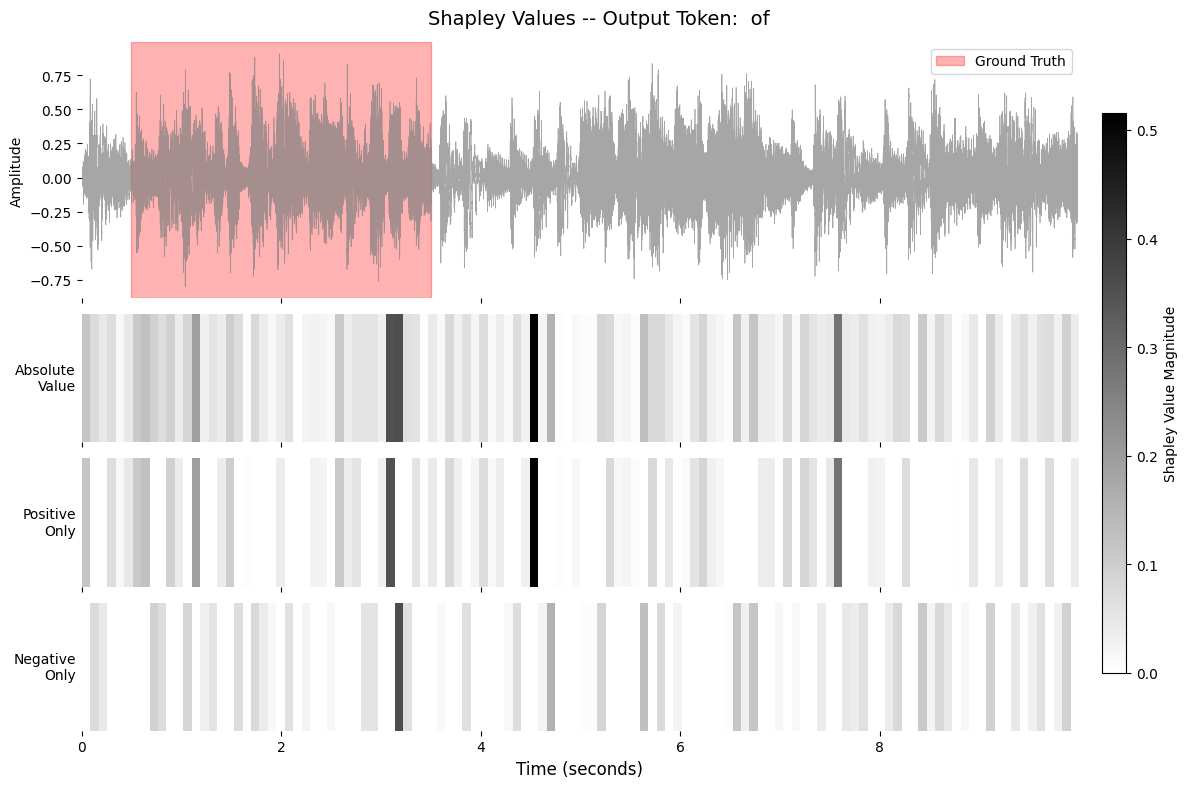

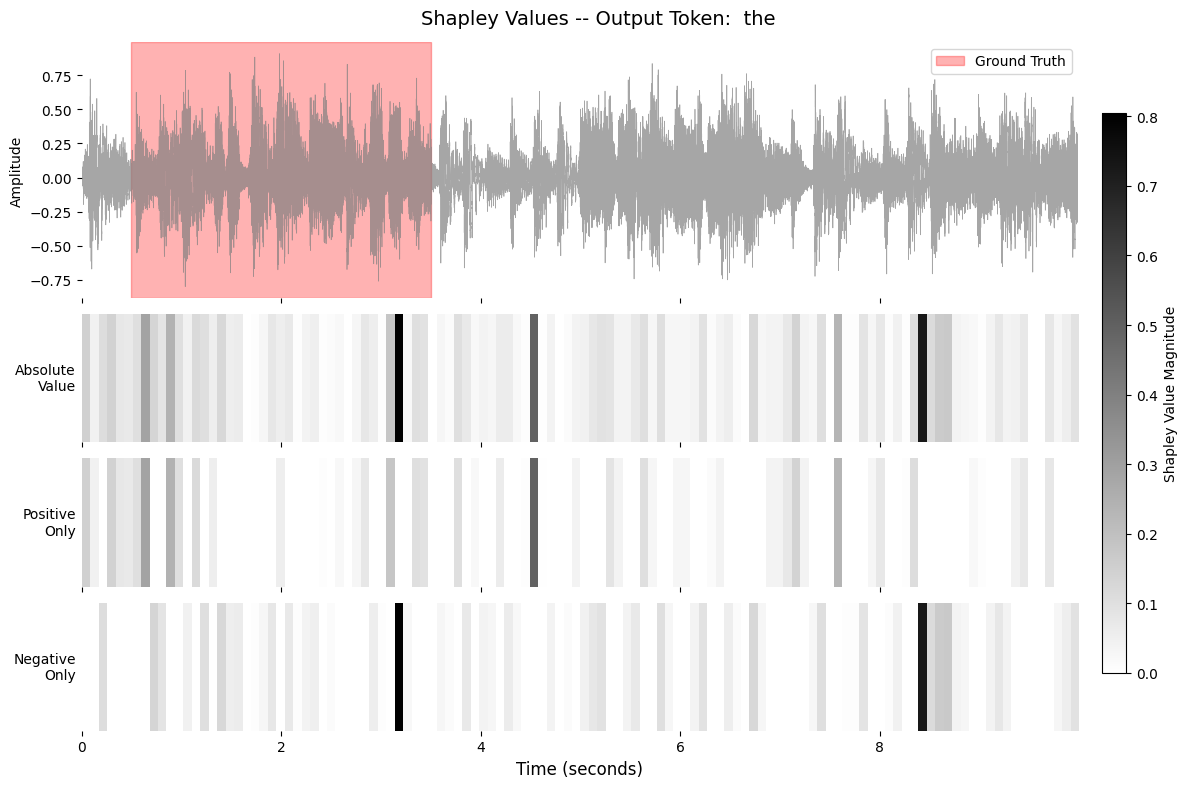

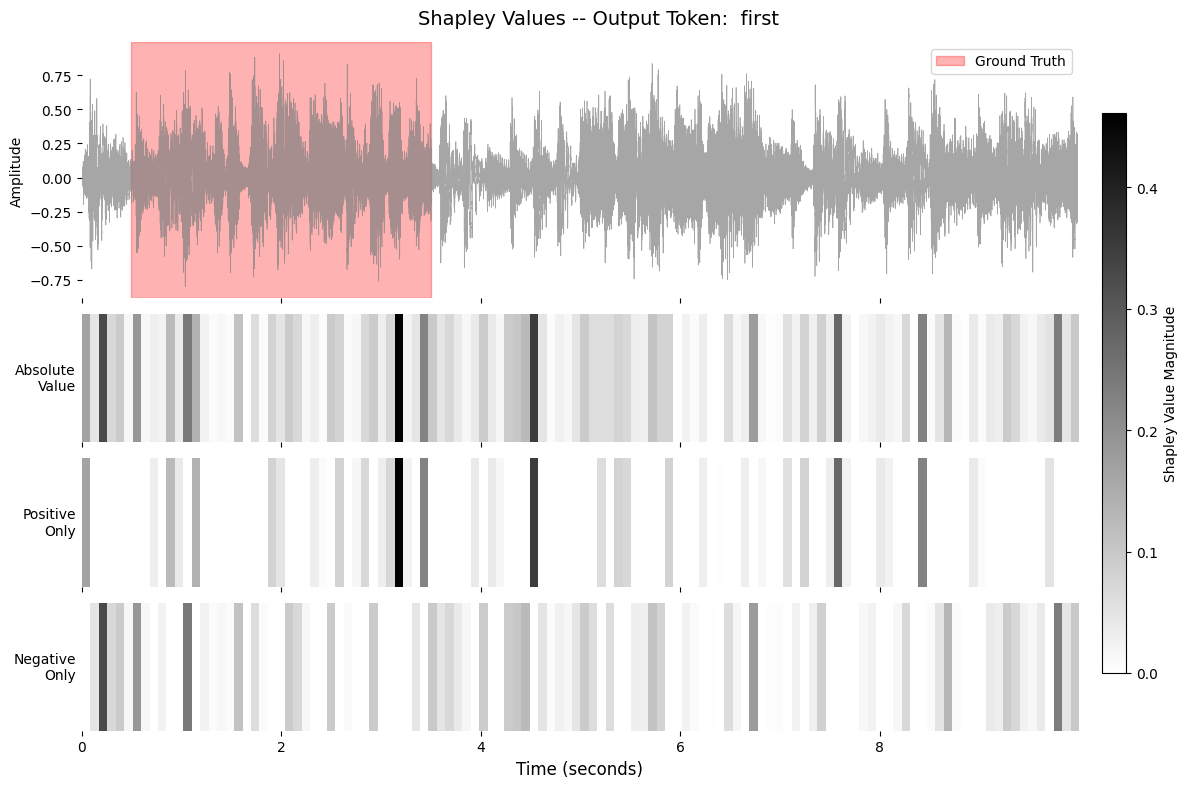

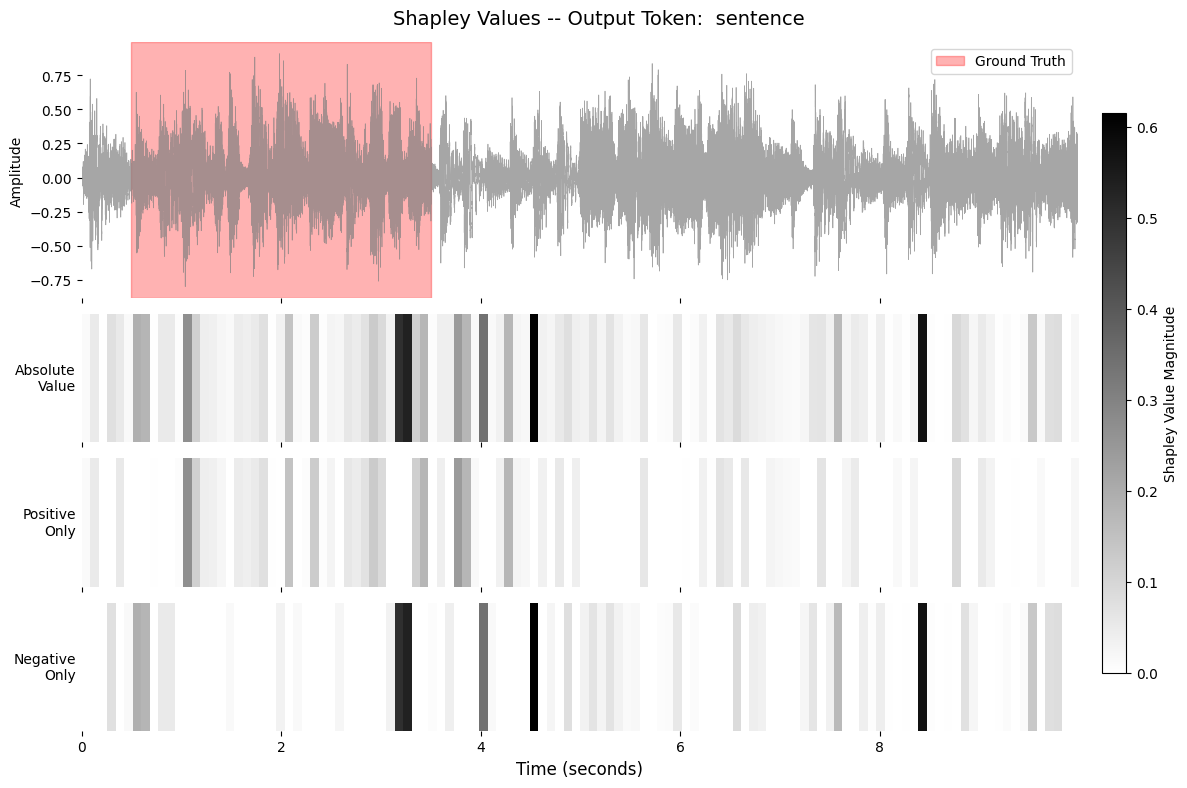

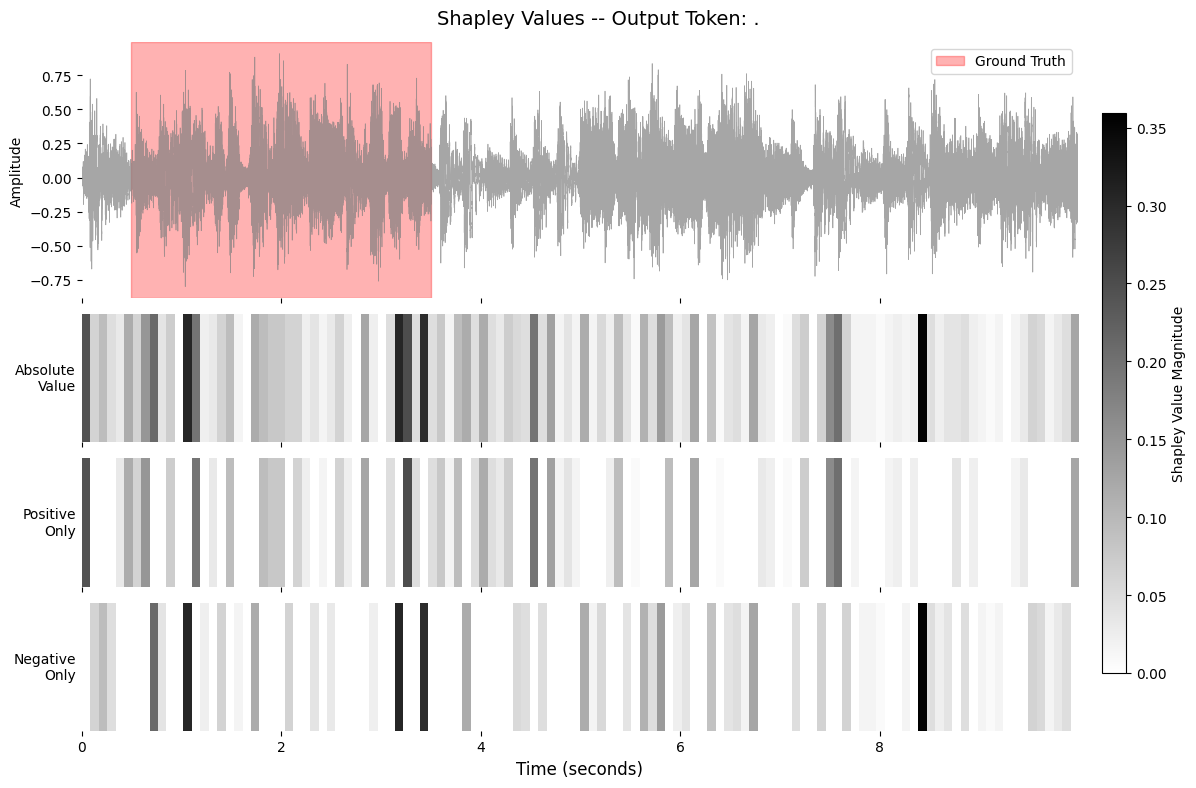

In [35]:
for idx, t in enumerate(example["output_tokens"]):
    plot_shapley_analysis(
        x, 
        sample_rate=fs, 
        audio_shapley_values=audio_shapley_values[:,idx], 
        gt_start=0.5, 
        gt_end=3.5, 
        colormap="binary", 
        idx=idx,
        output_token=t
    )

/tmp/ipykernel_84744/3352594984.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


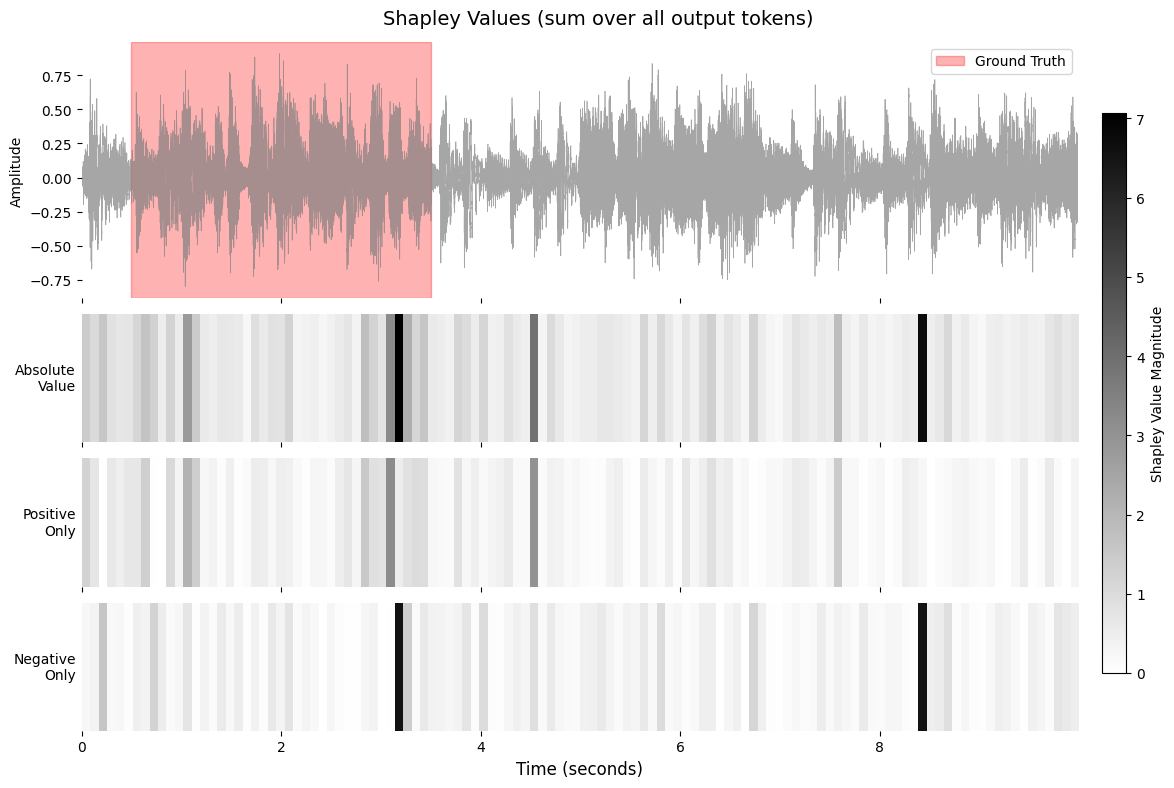

In [34]:
plot_shapley_analysis(
    x, 
    sample_rate=fs, 
    audio_shapley_values=audio_shapley_values, 
    gt_start=0.5, 
    gt_end=3.5, 
    colormap="binary", 
)

In [ ]:
# load model and tokenizer to encode output 

In [ ]:
example["model_output"].values[0]

In [ ]:
example["prompt"].values[0]

In [131]:
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import HTML, display

def visualize_shapley_analysis(text_shapley_values, tokens, 
                             audio_signal, audio_shapley_values, sample_rate,
                             gt_start, gt_end, 
                             max_abs_value=None, colormap='viridis',
                             figsize=(12, 10), idx=None, output_token=None):
    """
    Combined visualization of text and audio Shapley values with shared color scaling.
    
    Args:
        text_shapley_values: List of Shapley values for text tokens
        tokens: List of text tokens
        audio_signal: Audio waveform array
        audio_shapley_values: 2D array of Shapley values for audio
        sample_rate: Audio sample rate (Hz)
        gt_start: Start time of ground truth event (seconds)
        gt_end: End time of ground truth event (seconds)
        max_abs_value: Optional maximum absolute value for color scaling
        colormap: Matplotlib colormap to use
        figsize: Figure size (width, height) in inches
        idx: Optional index for specific output token
        output_token: Optional output token name
    """
    
    # First generate the highlighted text HTML
    highlighted_html = highlight_tokens(text_shapley_values, tokens, max_abs_value, colormap=colormap, idx=idx, output_token=output_token)
    
    # Display the highlighted text separately (this will render the HTML properly)
    display(HTML(f"<div style='font-size: 12pt; margin-bottom: 10px;'>{highlighted_html}</div>"))
    
    # Determine global color scaling
    if max_abs_value is None:
        text_max = np.max(np.abs(text_shapley_values))
        audio_max = np.max(np.abs(audio_shapley_values))
        max_abs_value = max(text_max, audio_max)
    
    # Create figure for audio visualization
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(4, 2, height_ratios=[2, 1, 1, 1], width_ratios=[10, 1])
    
    # --- 1. Signal plot (top subplot) ---
    ax_signal = fig.add_subplot(gs[0, 0])
    total_duration = len(audio_signal) / sample_rate
    time_axis = np.linspace(0, total_duration, len(audio_signal))
    ax_signal.plot(time_axis, audio_signal, color='gray', alpha=0.7, linewidth=0.5)
    ax_signal.set_ylabel('Amplitude', fontsize=10)
    
    # Add ground truth rectangle
    ymin, ymax = ax_signal.get_ylim()
    ax_signal.axvspan(gt_start, gt_end, ymin=0, ymax=1, 
                     color='red', alpha=0.3, label='Ground Truth')
    ax_signal.legend(loc='upper right')
    
    # --- Audio Shapley visualizations ---
    # Calculate Shapley value components
    abs_shapley = np.abs(audio_shapley_values)
    pos_shapley = np.clip(audio_shapley_values, a_min=0, a_max=None)
    neg_shapley = np.clip(audio_shapley_values, a_min=None, a_max=0)
    
    if idx is None and output_token is None:
        abs_shapley = abs_shapley.sum(axis=1)
        pos_shapley = pos_shapley.sum(axis=1)
        neg_shapley = neg_shapley.sum(axis=1)
    else:
        abs_shapley = abs_shapley[:, idx]
        pos_shapley = pos_shapley[:, idx]
        neg_shapley = neg_shapley[:, idx]
    
    shapley_time_axis = np.linspace(0, total_duration, len(abs_shapley))
    
    # 2. Absolute Shapley values
    ax_abs = fig.add_subplot(gs[1, 0])
    im_abs = ax_abs.imshow(
        np.repeat(abs_shapley.reshape(1, -1), 10, axis=0),
        aspect='auto',
        cmap=colormap,
        extent=[0, total_duration, 0, 1],
        vmin=0,
        vmax=max_abs_value
    )
    ax_abs.set_ylabel('Absolute\nValue', rotation=0, ha='right', va='center', fontsize=10)
    ax_abs.set_yticks([])
    
    # 3. Positive Shapley values
    ax_pos = fig.add_subplot(gs[2, 0])
    im_pos = ax_pos.imshow(
        np.repeat(pos_shapley.reshape(1, -1), 10, axis=0),
        aspect='auto',
        cmap=colormap,
        extent=[0, total_duration, 0, 1],
        vmin=0,
        vmax=max_abs_value
    )
    ax_pos.set_ylabel('Positive\nOnly', rotation=0, ha='right', va='center', fontsize=10)
    ax_pos.set_yticks([])
    
    # 4. Negative Shapley values
    ax_neg = fig.add_subplot(gs[3, 0])
    im_neg = ax_neg.imshow(
        np.repeat(np.abs(neg_shapley).reshape(1, -1), 10, axis=0),
        aspect='auto',
        cmap=colormap,
        extent=[0, total_duration, 0, 1],
        vmin=0,
        vmax=max_abs_value
    )
    ax_neg.set_ylabel('Negative\nOnly', rotation=0, ha='right', va='center', fontsize=10)
    ax_neg.set_yticks([])
    ax_neg.set_xlabel('Time (seconds)', fontsize=12)
    
    # --- Colorbar ---
    cax = fig.add_subplot(gs[:, 1])
    norm = mpl.colors.Normalize(vmin=0, vmax=max_abs_value)
    sm = cm.ScalarMappable(norm=norm, cmap=colormap)
    fig.colorbar(sm, cax=cax, label='Shapley Value Magnitude')
    
    # --- Formatting ---
    fig_title = "Shapley Value Analysis"
    if idx is not None:
        fig_title += f" - Output Token: {output_token}"
    plt.suptitle(fig_title, y=0.98, fontsize=14)
    plt.tight_layout()
    
    # Remove boxes around subplots
    for ax in [ax_signal, ax_abs, ax_pos, ax_neg]:
        ax.set_frame_on(False)
    
    plt.subplots_adjust(right=0.9, hspace=0.1)
    # plt.savefig(f"{output_token}.png")
    plt.show()
    
    return highlighted_html

def highlight_tokens(shapley_values, tokens, max_abs_value, colormap='viridis', idx=None, output_token=None):
    """Highlight text using the same colormap as audio visualization."""

    if idx is None and output_token is None:
        shap_values = shapley_values.sum(axis=1)
    else:
        shap_values = shapley_values[:, idx]
        
    shapley_values = np.array(shap_values, dtype=float)
    normalized_values = shap_values / (max_abs_value + 1e-10)
    
    cmap = cm.get_cmap(colormap)
    
    highlighted_text = []
    for value, token in zip(normalized_values, tokens):
        if value == 0:
            highlighted_text.append(token)
            continue
            
        # Map normalized value to [0.2, 0.8] to avoid extreme colors
        intensity = 0.2 + 0.6 * (abs(value))
        rgba = cmap(intensity)
        hex_color = rgb2hex(rgba)
        span = f'<span style="background-color: {hex_color}">{token}</span>'
        highlighted_text.append(span)
    
    return ' '.join(highlighted_text)

In [132]:
question_shapley_values.sum(axis=1).shape

(118,)

/tmp/ipykernel_84744/2183440106.py:151: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(colormap)


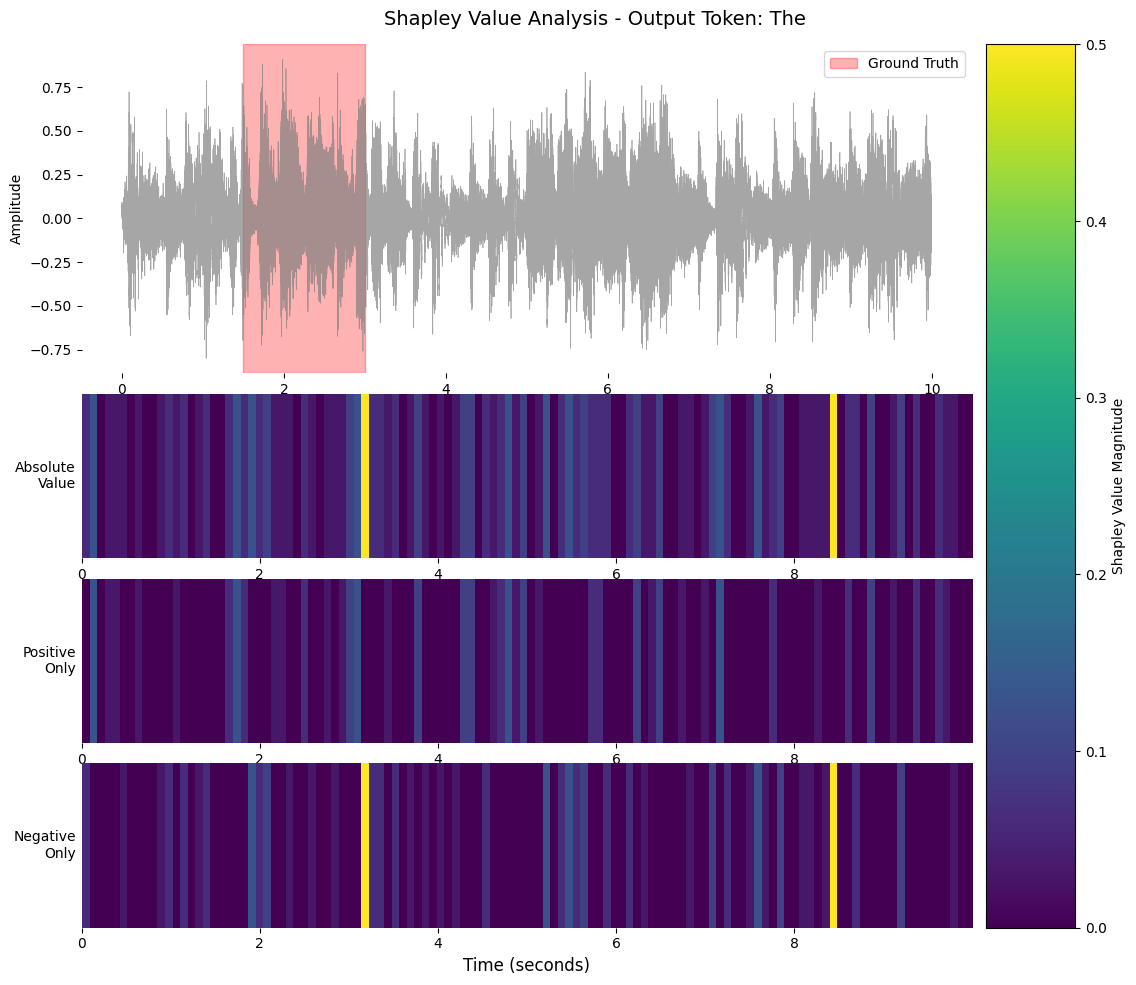

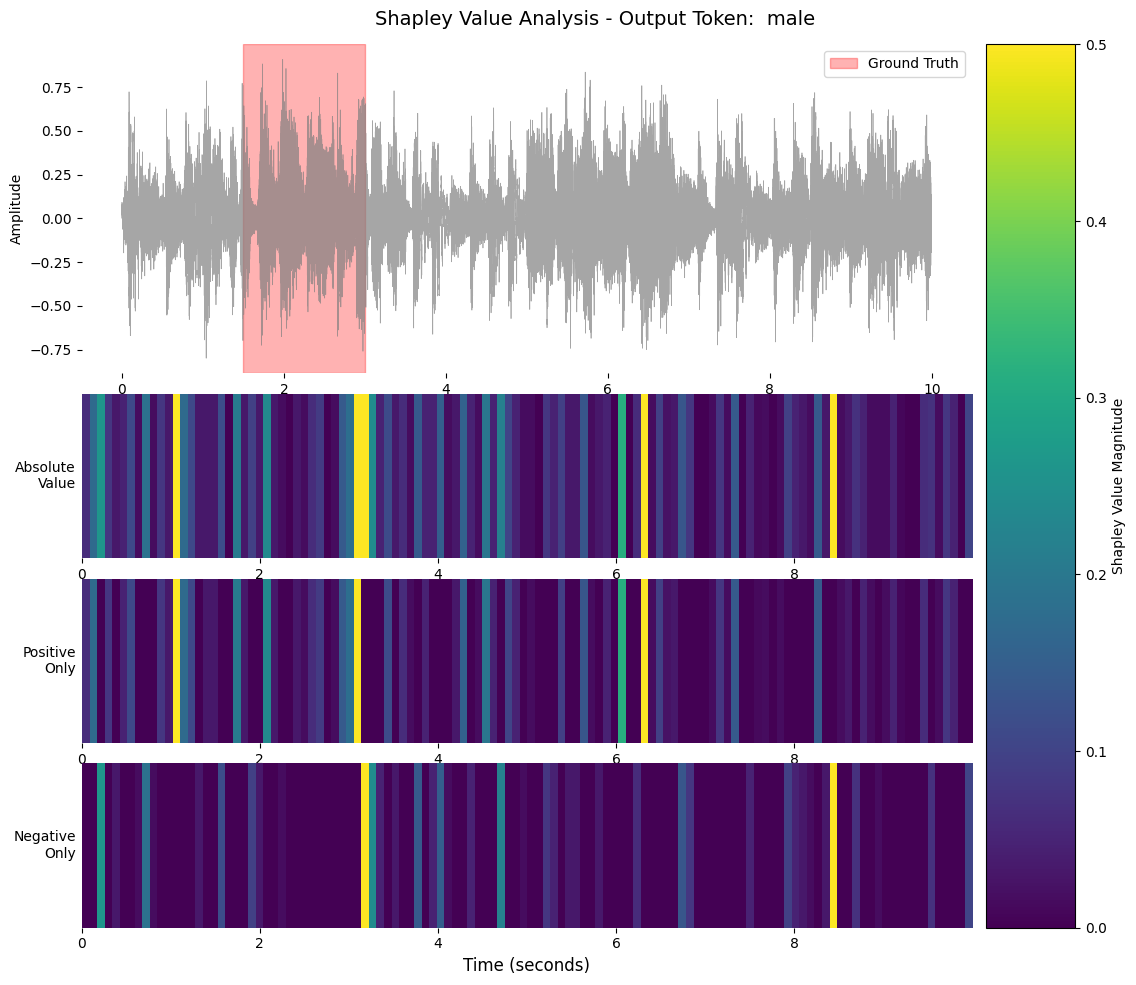

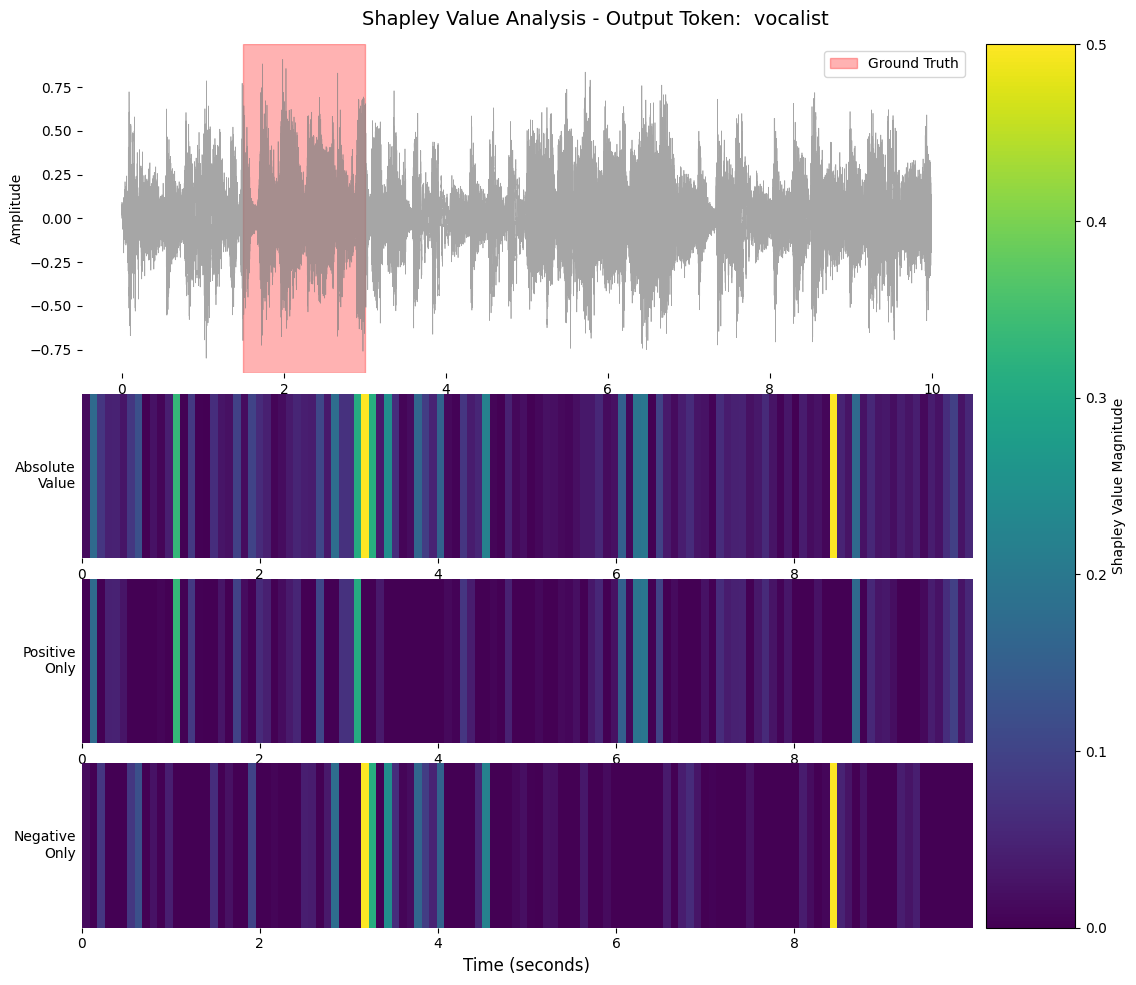

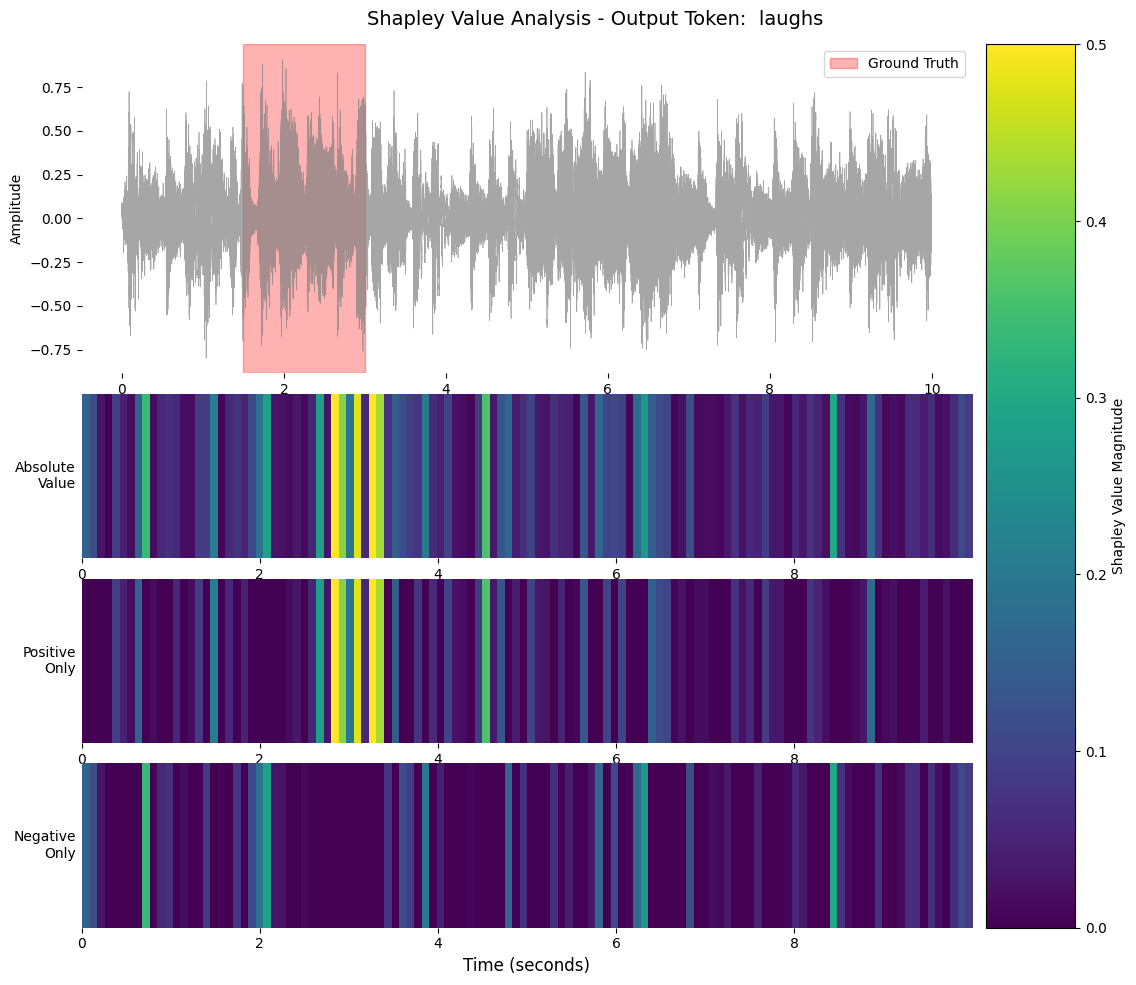

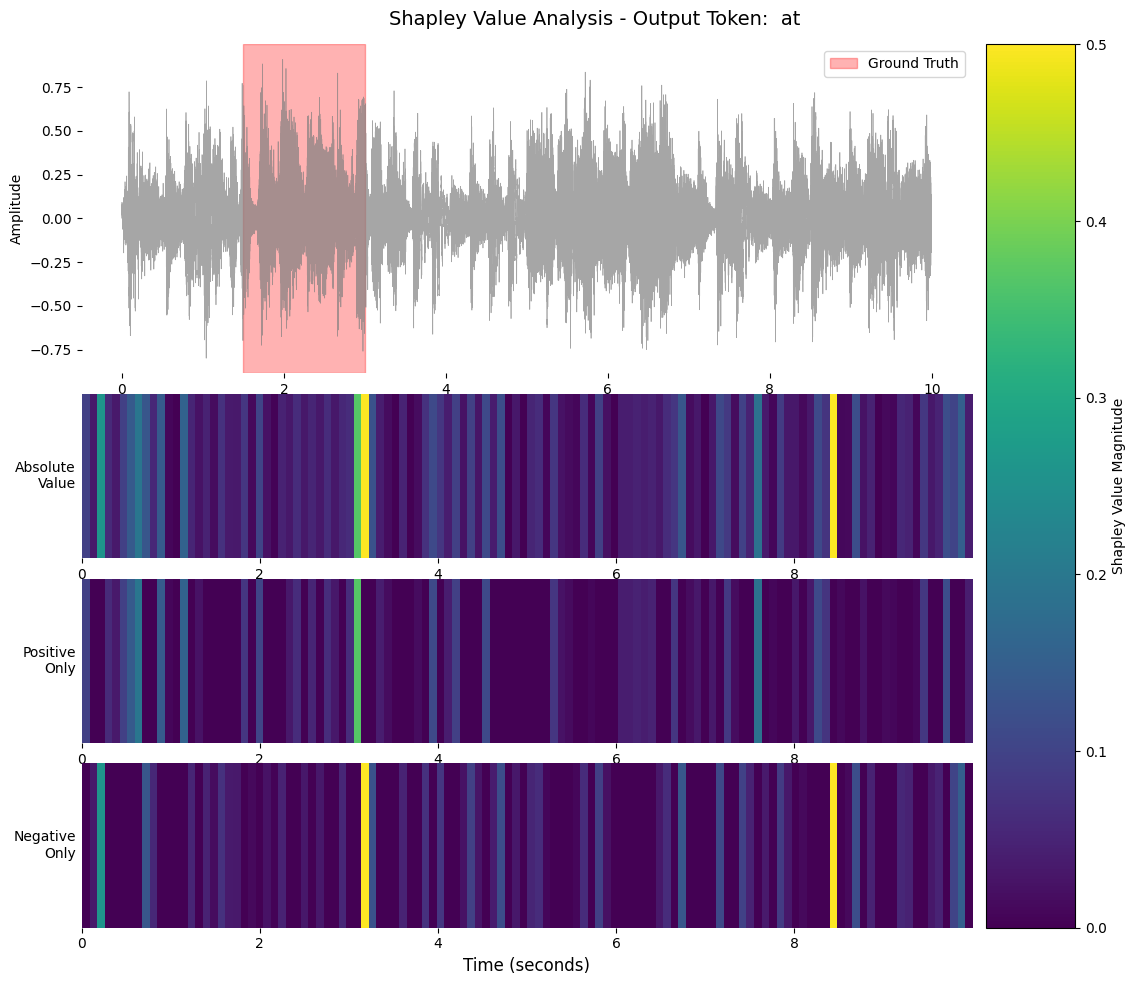

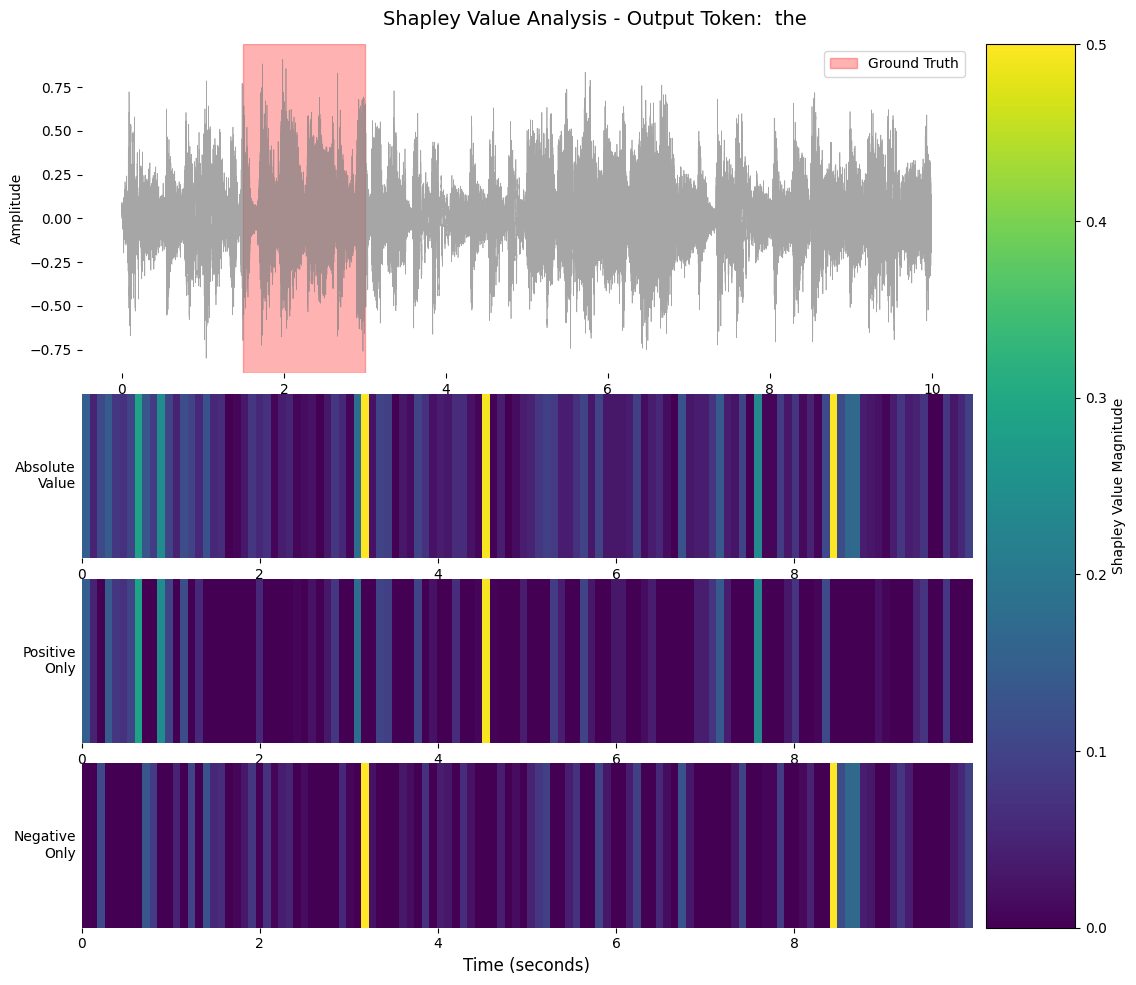

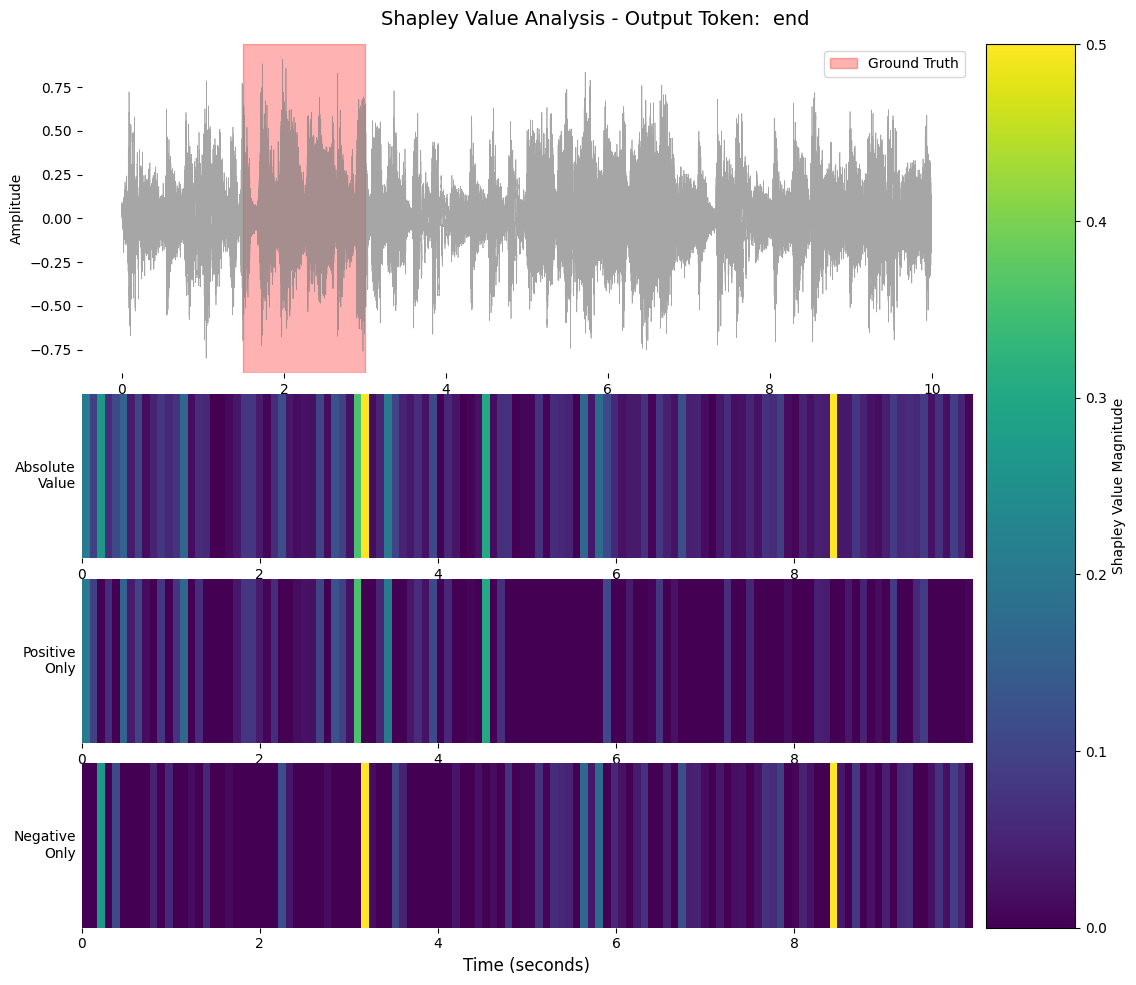

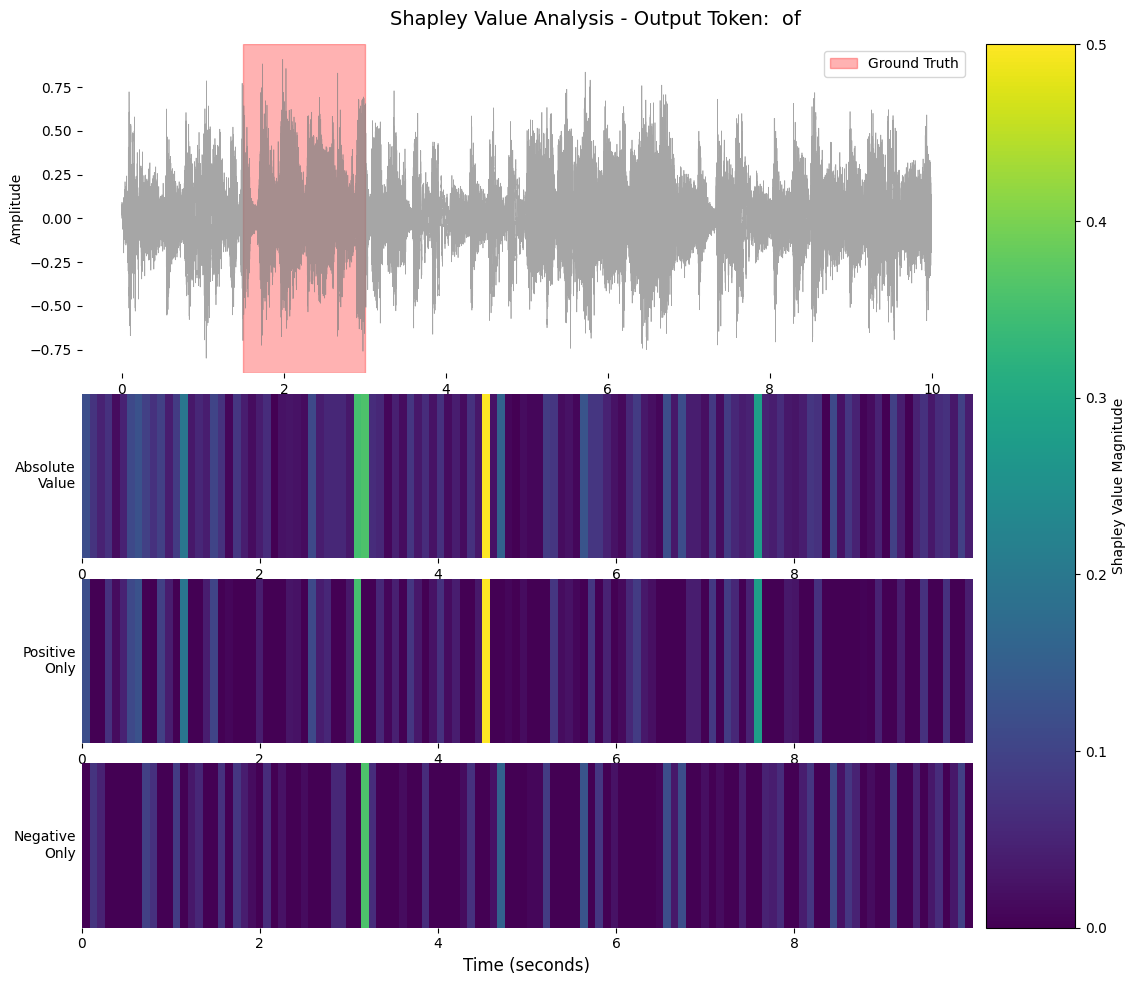

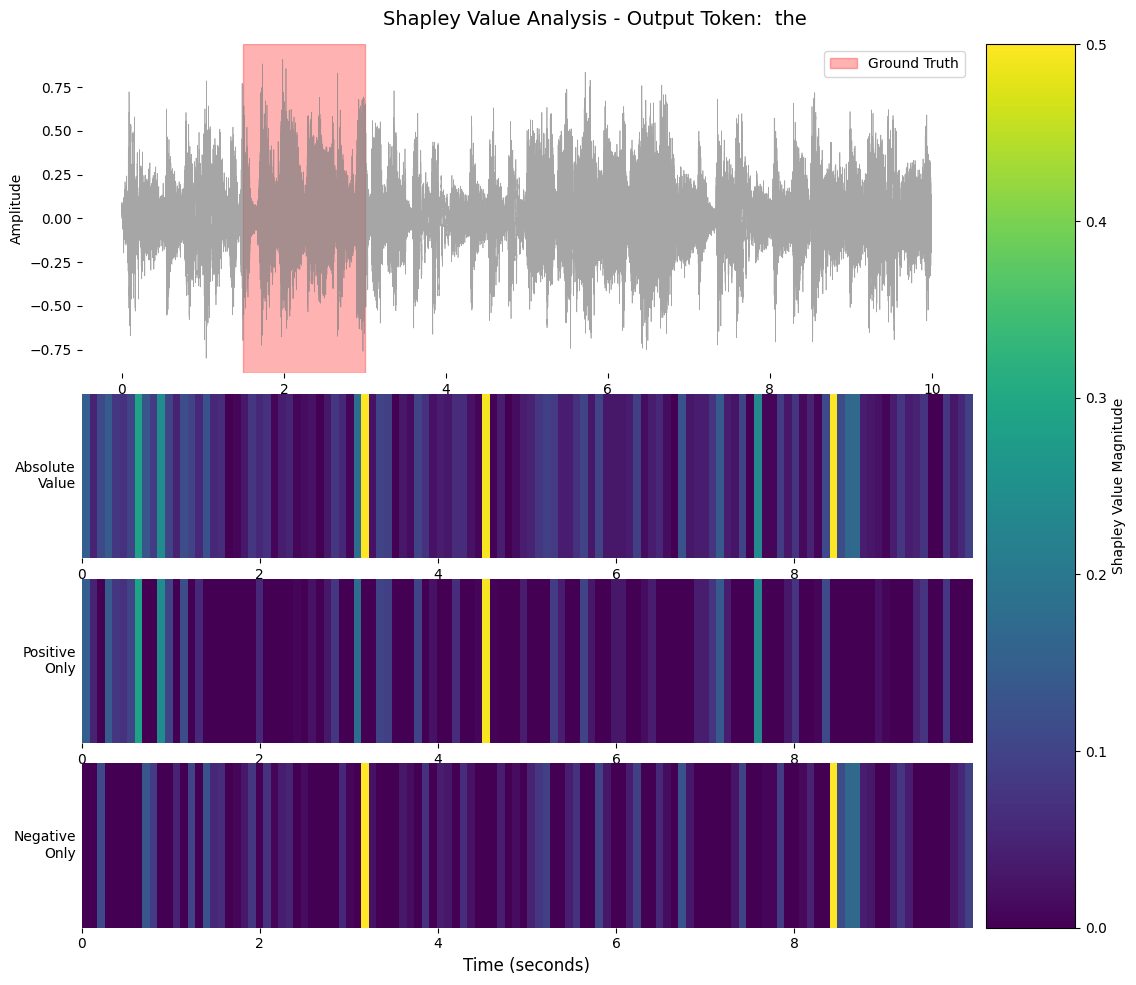

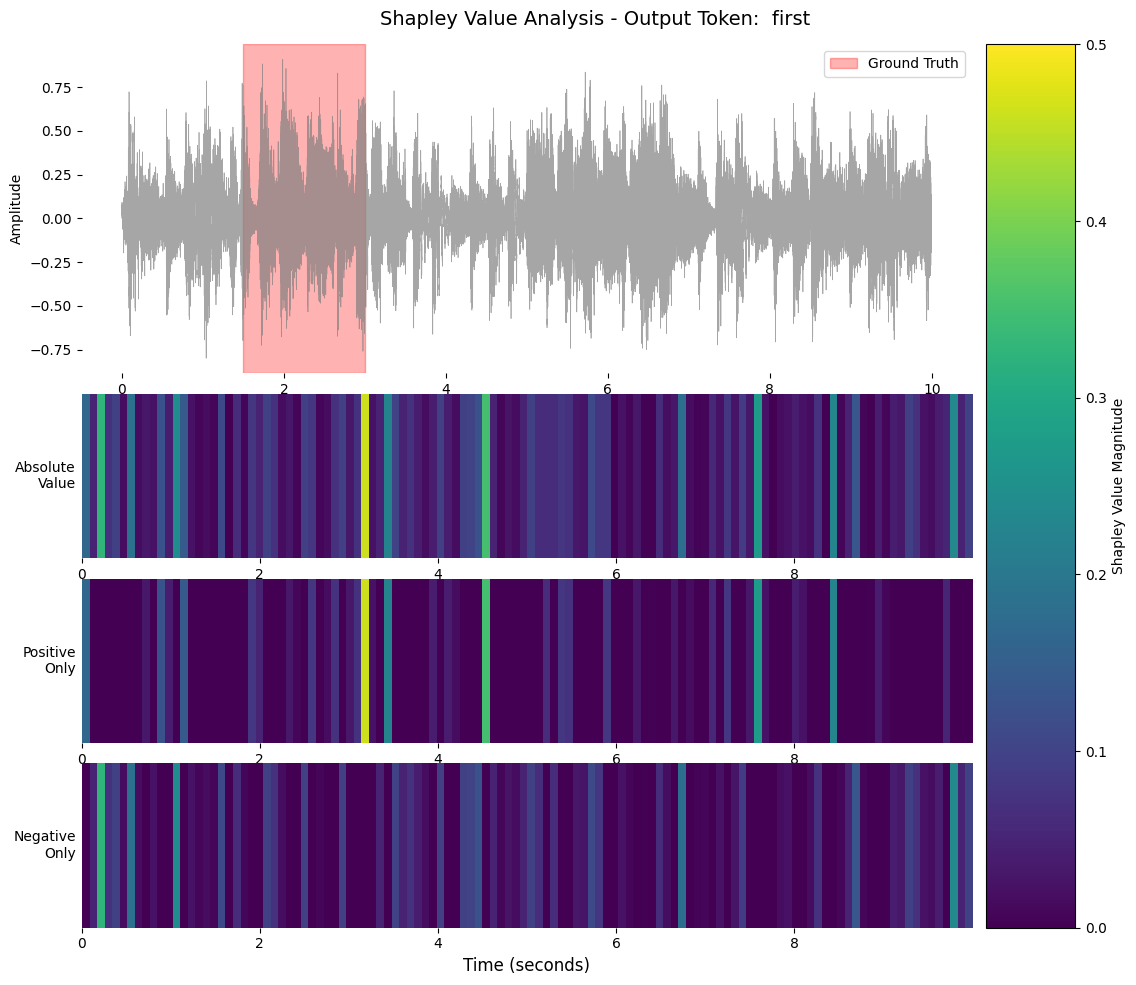

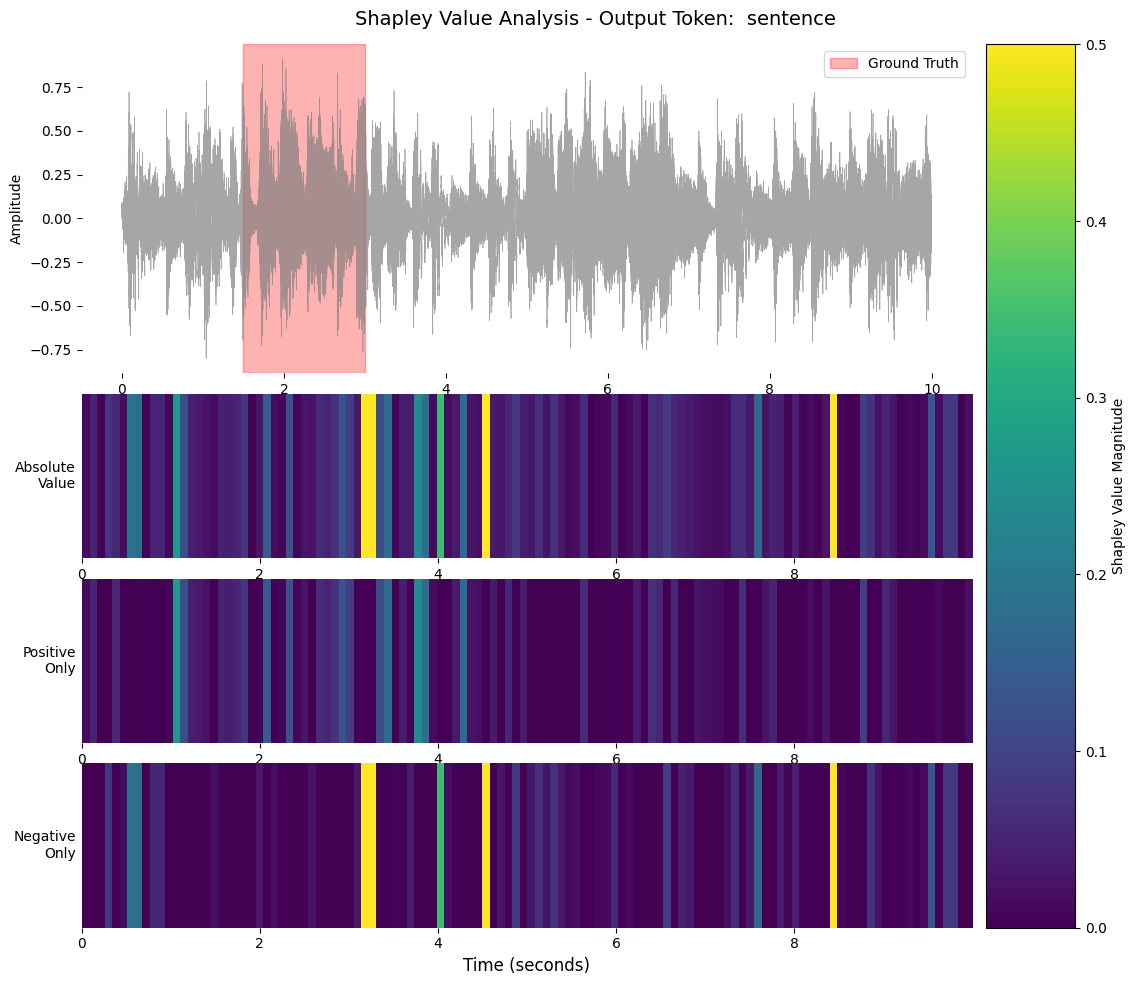

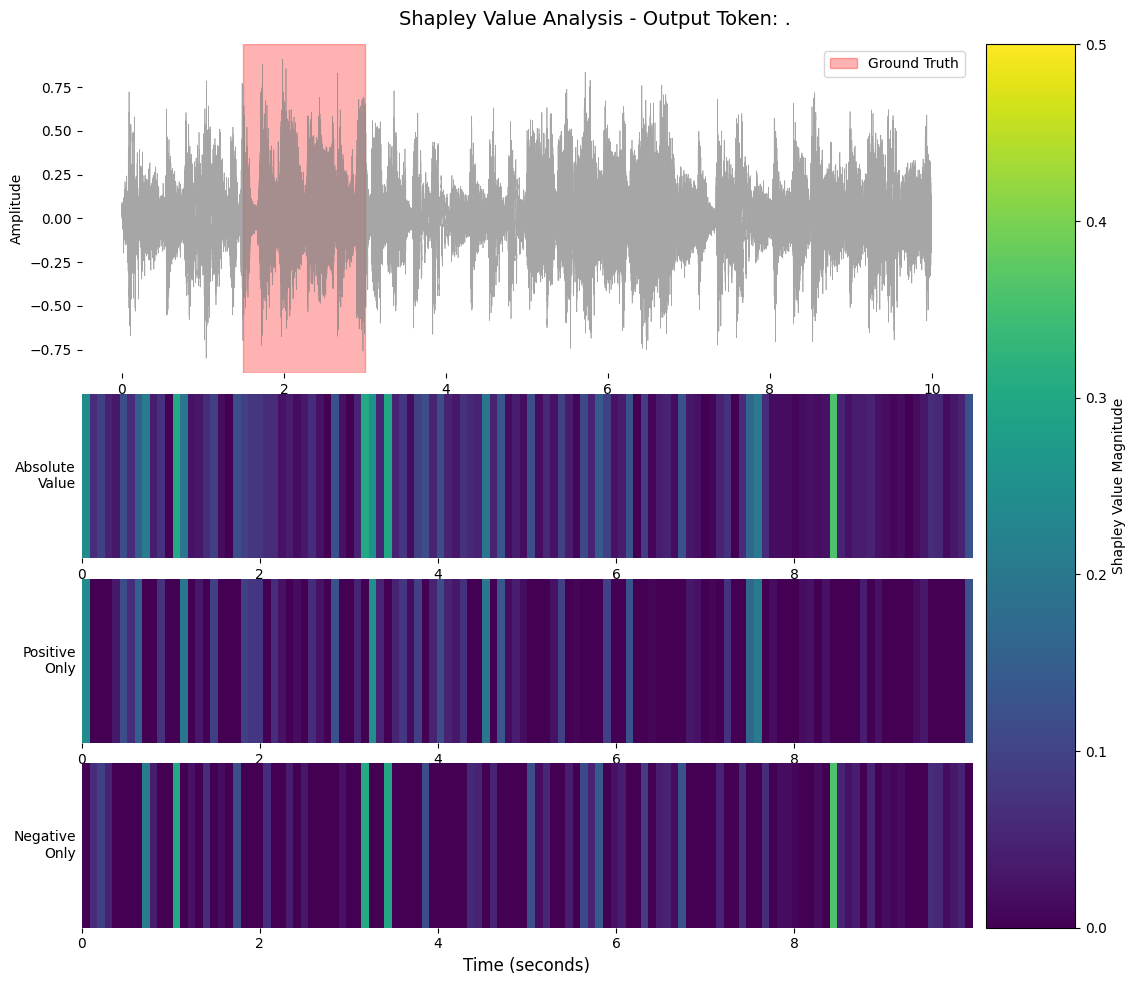

In [133]:
data = f"../{example['output_folder']}_info.npz"
data = np.load(data)

all_shapley_values = data["shapley_values"].squeeze(0).squeeze(0)
audio_shapley_values = all_shapley_values[audio_tokens]
question_shapley_values = all_shapley_values[question_tokens]

for idx, t in enumerate(example["output_tokens"]):
    highlighted_text = visualize_shapley_analysis(
        text_shapley_values=question_shapley_values,
        tokens=example["input_tokens"],
        audio_signal=x,
        audio_shapley_values=audio_shapley_values,
        sample_rate=16000,
        gt_start=1.5,
        gt_end=3.0,
        max_abs_value=0.5, # Optional,
        idx=idx,
        output_token=t,
        # colormap="binary"
    )

/tmp/ipykernel_84744/2183440106.py:151: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(colormap)


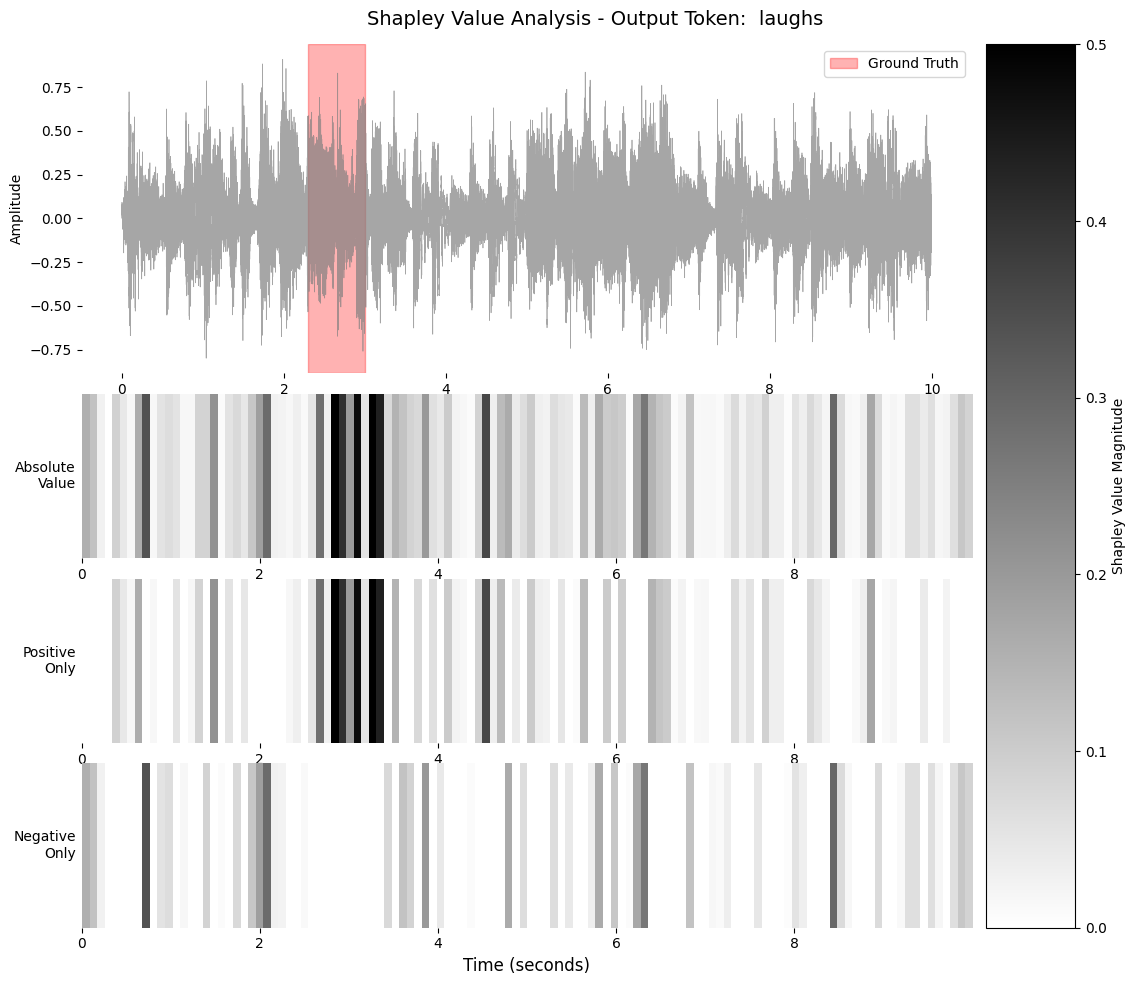

In [138]:
highlighted_text = visualize_shapley_analysis(
        text_shapley_values=question_shapley_values,
        tokens=example["input_tokens"],
        audio_signal=x,
        audio_shapley_values=audio_shapley_values,
        sample_rate=16000,
        gt_start=2.3,
        gt_end=3.0,
        max_abs_value=0.5, # Optional,
        idx=3,
        output_token=example["output_tokens"][3],
        colormap="binary"
    )

/tmp/ipykernel_84744/2183440106.py:151: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(colormap)


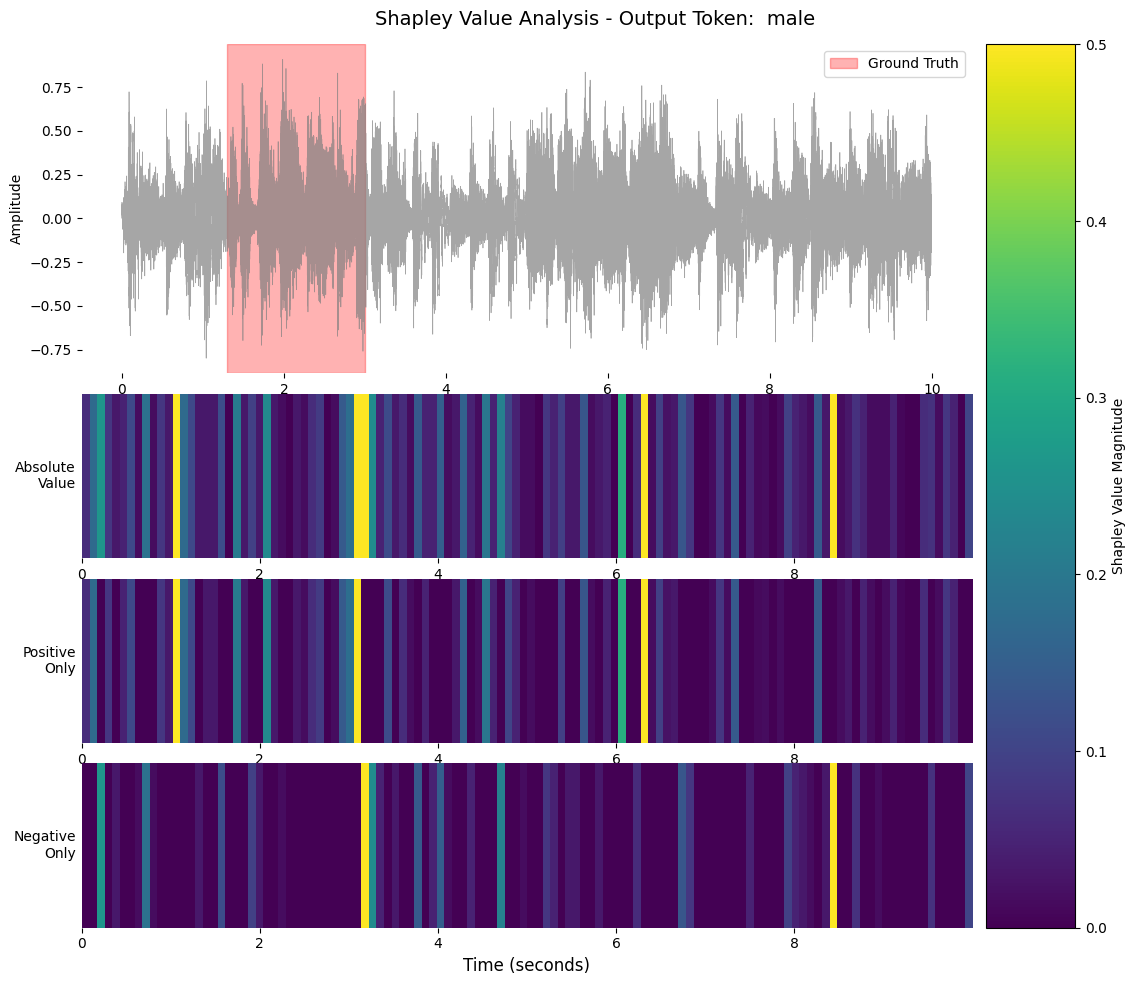

In [135]:
idx = 1
highlighted_text = visualize_shapley_analysis(
        text_shapley_values=question_shapley_values,
        tokens=example["input_tokens"],
        audio_signal=x,
        audio_shapley_values=audio_shapley_values,
        sample_rate=16000,
        gt_start=1.3,
        gt_end=3.0,
        max_abs_value=0.5, # Optional,
        idx=idx,
        output_token=example["output_tokens"][idx],
        # colormap="binary"
    )